## Задание 1

Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. 
Т. е. если поисковый запрос содержит название города региона, то в столбце 'region' пишется название этого региона. 
Если поисковый запрос не содержит названия города, то ставим 'undefined'.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

    'Центр': ['москва', 'тула', 'ярославль'],

    'Северо-Запад': ['петербург', 'псков', 'мурманск'],

    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']

}
Результат классификации запишите в отдельный столбец region.

In [2]:
import pandas as pd

In [12]:
geo_data = {
    'Центр': ['москва', 'тула', 'ярославль'],
    'Северо-Запад': ['петербург', 'псков', 'мурманск'],
    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

In [13]:
geo_data['Центр']

['москва', 'тула', 'ярославль']

In [14]:
keywords = pd.read_csv('keywords.csv')
keywords.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [15]:
def geo_cheak(row):
    '''
    в каждой паре "ключ значение" в словаре, 
    берем каждый элемент value,
    проверяем элемент на вхождение в столбец keywords.
    если да, возвращаем ключ
    '''
    for reg, cities in geo_data.items():
        for c in cities:
            if c in row['keyword']:
                return reg
    return 'undefined'

In [16]:
keywords['region'] = keywords.apply(geo_cheak, axis=1)
keywords['region'].value_counts()

undefined         99253
Центр               387
Северо-Запад        266
Дальний Восток       94
Name: region, dtype: int64

## Задание 2

Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:

оценка 2 и меньше - низкий рейтинг
оценка 4 и меньше - средний рейтинг
оценка 4.5 и 5 - высокий рейтинг
Результат классификации запишите в столбец class

In [17]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings['rating'].value_counts()

4.0    28750
3.0    20064
5.0    15095
3.5    10538
4.5     7723
2.0     7271
2.5     4449
1.0     3326
1.5     1687
0.5     1101
Name: rating, dtype: int64

In [18]:
movies = pd.read_csv('ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
r_m_est = ratings.merge(movies, on='movieId', how='left')
r_m_est.head(1)

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama


In [24]:
r_m_est.groupby('title').mean()['rating'].reset_index().head(5)

,title,rating
0,"""Great Performances"" Cats (1998)",1.750000
1,$9.99 (2008),3.833333
2,'Hellboy': The Seeds of Creation (2004),2.000000
3,'Neath the Arizona Skies (1934),0.500000
4,'Round Midnight (1986),2.250000


In [25]:
def pro_class(row):
    '''
    проверяет значение столбца rating в каждой строке условию
    '''
    if row['rating'] < 2:
        return 'низкий рейтинг'
    elif row['rating'] > 4:
        return 'высокий рейтинг'
    else:
        return 'средний рейтинг'

In [26]:
r_m_est['class'] = r_m_est.apply(pro_class, axis=1)
r_m_est.head()

,userId,movieId,rating,timestamp,title,genres,class
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,средний рейтинг
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical,средний рейтинг
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller,средний рейтинг
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller,средний рейтинг
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama,средний рейтинг


## Задание 3

Посчитайте среднее значение Lifetime киноманов (пользователи, которые поставили 100 и более рейтингов). 
Под Lifetime понимается разница между максимальным и минимальным значением timestamp для каждого пользователя. 
Ответ дайте в днях.

In [27]:
# считаем для каждого пользователя кол-во оценок
ratings_filter = ratings.groupby('userId').count()
ratings_filter.head()

,movieId,rating,timestamp
userId,,,
1,20,20,20
2,76,76,76
3,51,51,51
4,204,204,204
5,100,100,100


In [28]:
# выявляем пользователей с кол-вом оценок больше 100
ratings_filter = ratings_filter[ratings_filter['rating'] > 100]
ratings_filter.head()

,movieId,rating,timestamp
userId,,,
4,204,204,204
8,116,116,116
15,1700,1700,1700
17,363,363,363
19,423,423,423


In [29]:
# делаем userId столбцом, а не индексом
ratings_filter = ratings_filter.reset_index()
ratings_filter.head()

,userId,movieId,rating,timestamp
0,4,204,204,204
1,8,116,116,116
2,15,1700,1700,1700
3,17,363,363,363
4,19,423,423,423


In [30]:
# с помощью tolist перезаписываем ratings_filter - оставляем только киноманов
ratings_filter_top = ratings[ratings['userId'].isin(ratings_filter['userId'].tolist())]
ratings_filter_top.head()

,userId,movieId,rating,timestamp
147,4,10,4.0,949810645
148,4,34,5.0,949919556
149,4,112,5.0,949810582
150,4,141,5.0,949919681
151,4,153,4.0,949811346


In [31]:
# находим max и min по timestamp для каждого пользователя
ratings_filter_top = ratings_filter_top.groupby('userId').agg(['min', 'max'])['timestamp']
ratings_filter_top.head()

,min,max
userId,,
4,949778714,949982274
8,1154389340,1154474527
15,997937239,1469330735
17,1127468587,1127476640
19,855190091,855195373


In [32]:
# допавляем параметр dev - разница между max и min
ratings_filter_top['dev'] = ratings_filter_top['max'] - ratings_filter_top['min']
ratings_filter_top.head()

,min,max,dev
userId,,,
4,949778714,949982274,203560
8,1154389340,1154474527,85187
15,997937239,1469330735,471393496
17,1127468587,1127476640,8053
19,855190091,855195373,5282


In [33]:
# ответ
ratings_filter_top['dev'].mean() / 3600/ 24

463.89476214829165

## Задание 4

Есть мнение, что "раньше снимали настоящее кино, не то что сейчас". Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из материалов занятия. Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

В переменную years запишите список из всех годов с 1950 по 2010.

Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

  - для каждой строки пройдите по всем годам списка years
  - если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
  - если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец 'year'

Посчитайте средний рейтинг всех фильмов для каждого значения столбца 'year' и отсортируйте результат по убыванию рейтинга

In [34]:
# создали список лет с 1950-2010 годы
years = list(range(1950, 2011))

In [35]:
# выгрузили датасет movies
movies = pd.read_csv('ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [36]:
# соединили данные из movies и ratings по полю movieId 
r_m = ratings.merge(movies, on='movieId', how='left')
r_m.head(1)

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama


In [37]:
def production_year(row):
    '''
    ищем в title значение года из year
    если нашли возвращаем это значение
    если нет, то возращаем 1900
    '''
    for i in years:
        if str(i) in row['title']:
            return int(i)   
    return 1900

In [38]:
# создали столбец year, заполнили его значениями из списка years, принив функцию
r_m['year'] = r_m.apply(production_year, axis=1)

In [39]:
r_m['year'].value_counts().head(5)

1900    6925
1995    6635
1994    5861
1996    5109
1999    5034
Name: year, dtype: int64

In [40]:
#делаем группировку по годам и считаем для каждой группы среднее
# размещаем по возрастанию значения года
r_m_avg = r_m.groupby('year').mean()['rating'].reset_index().sort_values('year')

In [41]:
r_m_avg.head()

,year,rating
0,1900,3.602960
1,1950,3.915254
2,1951,3.983539
3,1952,4.000000
4,1953,3.754587


In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
#чтобы ответить на вопрос задания, нарисуем линейный график изменения среднего рейтинка по годам
x = list(r_m_avg['year'])  # абцисса
y = list(r_m_avg['rating']) # ордината

# убираем значение 1900
x = x[1:] 
y = y[1:]

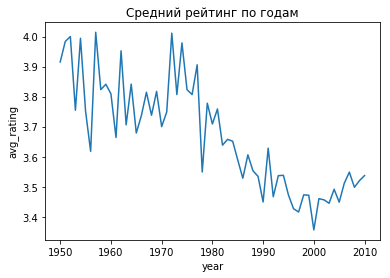

In [45]:
fig = plt.figure() # задали объект
plt.plot(x, y) # объявили вид графика и переменные с данными для постороения

plt.title('Средний рейтинг по годам')
plt.ylabel('avg_rating')
plt.xlabel('year')

plt.show()

Для данной выборки видим, что у фильмов, снятых после 80-х средний рейтинг стал немного меньше (3.8 vs 3.5).
Абсолютная разница около 0,3 балла. Что не является показателем радикального ухудшения качества фильмов после 80-х.

С 1950-2010 гг. все средние значения поместились в диапазон 3.3 - 4.0 (разброс меньше 1 балла)

Плюс не учтены около 7 % датасета

In [46]:
# % исходного датасета не учтенного в графическом анализе

devv = 6925/len(r_m)*100
devv

6.924723011079557